<a href="https://colab.research.google.com/github/noman13bd/ML-Practice/blob/master/ML_KNN_assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import DataSet
import pandas as pd
from matplotlib import pyplot as plt
# create 2 data frame. 1 for regression and another for classification
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weight-height.csv')
df_regression = df.copy()
df_classification = df.copy()
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Regression

In [3]:
# before doing regression separate X (gender, height) and Y (weight)
col_x_regr = df_regression[['Gender', 'Height']].copy()
col_y_regr = df_regression[['Weight']].copy()
# col_y_regr.head()
col_x_regr.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


# label Encoding

In [4]:
# apply label encoding on X
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import is_string_dtype

le = LabelEncoder()
all_columns = col_x_regr.columns
for column in all_columns:
  if is_string_dtype(col_x_regr[column]):
    # col_x_regr[column] = le.fit_transform(col_x_regr[column])
    col_x_regr.loc[:, column] = le.fit_transform(col_x_regr[column])

col_x_regr.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


# Train and Test Dataset for Linear Regression

In [5]:
# create train dataset and test dataset (70% / 30%)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(col_x_regr, col_y_regr, test_size=0.30)

# Linear Regression, MSE, MAE

In [6]:
# apply linear regression
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()

l_reg.fit(xtrain, ytrain)
# l_reg.predict([[1, 73.847017]])
test_predictions = l_reg.predict(xtest)

In [7]:
# get MSE, MAE 
from sklearn.metrics import mean_squared_error, mean_absolute_error
l_reg_mse = mean_squared_error(ytest, test_predictions)
l_reg_mse

105.0231809245568

In [8]:
l_reg_mae = mean_absolute_error(ytest, test_predictions)
l_reg_mae

8.182330119276365

# KNN Regression, MSE, MAE

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor
# Weight function used in prediction = uniform
kn_reg = KNeighborsRegressor(n_neighbors=5)
kn_reg.fit(xtrain, ytrain)
# kn_reg.predict([[1, 73.847017]])
knreg_test_predictions = kn_reg.predict(xtest)

# Weight function used in prediction = distance
kn_distance_reg = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn_distance_reg.fit(xtrain, ytrain)
# kn_reg.predict([[1, 73.847017]])
knreg_distance_test_predictions = kn_distance_reg.predict(xtest)



In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
kn_reg_mse = mean_squared_error(ytest, knreg_test_predictions)
kn_reg_mse

129.48881871989926

In [11]:
kn_reg_mae = mean_absolute_error(ytest, knreg_test_predictions)
kn_reg_mae

8.9957516528508

In [12]:
kn_reg_distance_mse = mean_squared_error(ytest, knreg_distance_test_predictions)
kn_reg_distance_mse

145.62581029972833

In [13]:
kn_reg_distance_mae = mean_absolute_error(ytest, knreg_distance_test_predictions)
kn_reg_distance_mae

9.5446285032016

# Bar Chart for obtained MSE and MAE from this 2 Algorithm

Text(0, 0.5, 'Value')

<Figure size 1440x720 with 0 Axes>

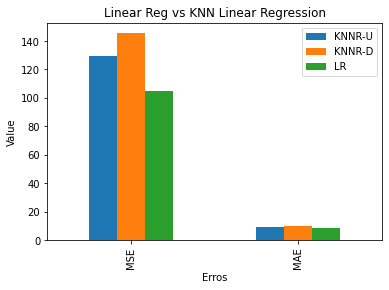

In [14]:
plt.figure(figsize=(20,10))
plotdata = pd.DataFrame({
    "KNNR-U":[kn_reg_mse, kn_reg_mae],
    "KNNR-D":[kn_reg_distance_mse, kn_reg_distance_mae],
    "LR":[l_reg_mse, l_reg_mae]
    }, 
    index=["MSE", "MAE"]
)
plotdata.plot(kind="bar")
plt.title("Linear Reg vs KNN Linear Regression")
plt.xlabel("Erros")
plt.ylabel("Value")

1. Import data set
2. Seperate x and y (y=Gender)
3. Train = 70%, Test = 30%
4. Apply Decision Tree Classifier 
5. Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)
6. Apply KNN Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


# Classification 

In [15]:
df_classification.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [16]:
col_x_dt_classifier = df_classification.drop('Gender', axis=1)
col_y_dt_classifier = df_classification['Gender']
col_x_dt_classifier.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


# Train and Test Dataset for Decision Tree Classifier

In [17]:
xtrain_dt, xtest_dt, ytrain_dt, ytest_dt = train_test_split(col_x_dt_classifier,col_y_dt_classifier,test_size=.30)

# Decision Tree Classifier, Score, Accuracy

[Text(0.49118501996908015, 0.9807692307692307, 'X[1] <= 157.914\ngini = 0.486\nsamples = 5988\nvalue = [2486, 3502]'),
 Text(0.18821260628703942, 0.9423076923076923, 'X[1] <= 145.66\ngini = 0.178\nsamples = 2414\nvalue = [2176, 238]'),
 Text(0.08084256634887915, 0.9038461538461539, 'X[1] <= 134.812\ngini = 0.068\nsamples = 1837\nvalue = [1772, 65]'),
 Text(0.023189899510435454, 0.8653846153846154, 'X[1] <= 68.811\ngini = 0.026\nsamples = 1231\nvalue = [1215, 16]'),
 Text(0.021128575109507858, 0.8269230769230769, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.02525122391136305, 0.8269230769230769, 'X[1] <= 128.693\ngini = 0.023\nsamples = 1229\nvalue = [1215, 14]'),
 Text(0.011337284205101777, 0.7884615384615384, 'X[0] <= 60.27\ngini = 0.013\nsamples = 907\nvalue = [901, 6]'),
 Text(0.006183973202782788, 0.75, 'X[0] <= 60.268\ngini = 0.03\nsamples = 260\nvalue = [256, 4]'),
 Text(0.004122648801855192, 0.7115384615384616, 'X[1] <= 112.822\ngini = 0.023\nsamples = 259\nvalue = [256, 

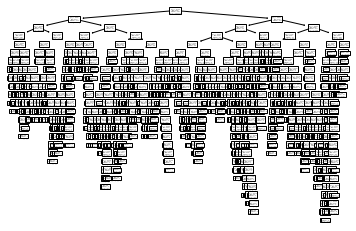

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(xtrain_dt, ytrain_dt)


tree.plot_tree(dt_clf)

[Text(0.49118501996908015, 0.9807692307692307, 'Weight <= 157.914\ngini = 0.486\nsamples = 5988\nvalue = [2486, 3502]'),
 Text(0.18821260628703942, 0.9423076923076923, 'Weight <= 145.66\ngini = 0.178\nsamples = 2414\nvalue = [2176, 238]'),
 Text(0.08084256634887915, 0.9038461538461539, 'Weight <= 134.812\ngini = 0.068\nsamples = 1837\nvalue = [1772, 65]'),
 Text(0.023189899510435454, 0.8653846153846154, 'Weight <= 68.811\ngini = 0.026\nsamples = 1231\nvalue = [1215, 16]'),
 Text(0.021128575109507858, 0.8269230769230769, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.02525122391136305, 0.8269230769230769, 'Weight <= 128.693\ngini = 0.023\nsamples = 1229\nvalue = [1215, 14]'),
 Text(0.011337284205101777, 0.7884615384615384, 'Height <= 60.27\ngini = 0.013\nsamples = 907\nvalue = [901, 6]'),
 Text(0.006183973202782788, 0.75, 'Height <= 60.268\ngini = 0.03\nsamples = 260\nvalue = [256, 4]'),
 Text(0.004122648801855192, 0.7115384615384616, 'Weight <= 112.822\ngini = 0.023\nsamples = 259

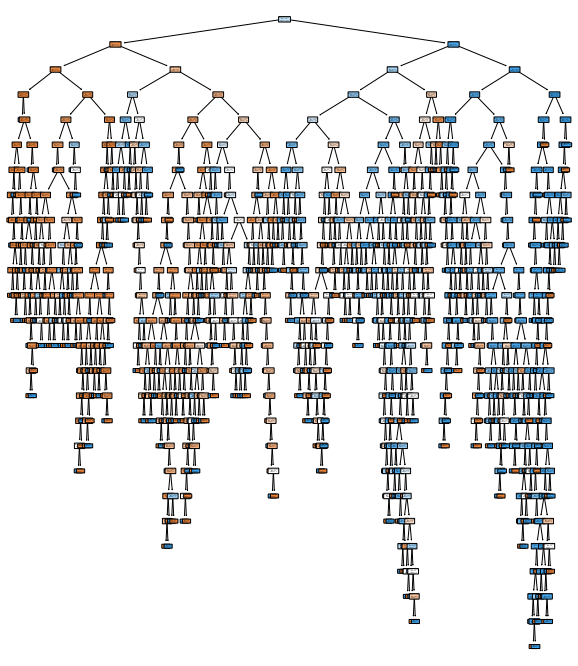

In [19]:
plt.figure(figsize=(10,12))
tree.plot_tree(dt_clf, rounded=True, filled=True,  feature_names=xtrain_dt.columns )

In [20]:
# score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve
import numpy as np

dtc_predictions = dt_clf.predict(xtest_dt)
dtc_predictions

np.array(dtc_predictions)
classification_report(ytest_dt, dtc_predictions)

'              precision    recall  f1-score   support\n\n      Female       0.86      0.84      0.85      1069\n        Male       0.89      0.90      0.89      1498\n\n    accuracy                           0.87      2567\n   macro avg       0.87      0.87      0.87      2567\nweighted avg       0.87      0.87      0.87      2567\n'

In [21]:
print(classification_report(ytest_dt, dtc_predictions))

              precision    recall  f1-score   support

      Female       0.86      0.84      0.85      1069
        Male       0.89      0.90      0.89      1498

    accuracy                           0.87      2567
   macro avg       0.87      0.87      0.87      2567
weighted avg       0.87      0.87      0.87      2567



In [22]:
confusion_matrix(ytest_dt, dtc_predictions)

array([[ 897,  172],
       [ 151, 1347]])

In [23]:
tp, fn, fp, tn = confusion_matrix(ytest_dt, dtc_predictions).reshape(-1) 

In [24]:
(tp+tn)/(tp+tn+fp+fn)

0.8741721854304636

In [25]:
accuracy_score(ytest_dt, dtc_predictions)

0.8741721854304636

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


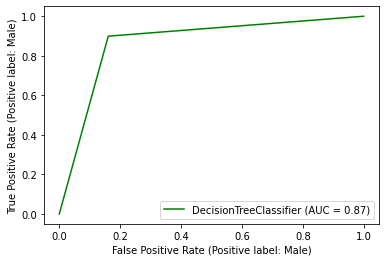

In [26]:
plot_roc_curve(dt_clf, xtest_dt, ytest_dt, color='GREEN')

# KNN Classifier, Score, Accuracy

In [37]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier(n_neighbors=5)

kn_clf.fit(xtrain_dt, ytrain_dt)
knc_predictions = kn_clf.predict(xtest_dt)
knc_predictions

array(['Male', 'Male', 'Female', ..., 'Male', 'Male', 'Male'],
      dtype=object)

In [38]:
classification_report(ytest_dt, knc_predictions)

'              precision    recall  f1-score   support\n\n      Female       0.90      0.88      0.89      1069\n        Male       0.92      0.93      0.92      1498\n\n    accuracy                           0.91      2567\n   macro avg       0.91      0.91      0.91      2567\nweighted avg       0.91      0.91      0.91      2567\n'

In [39]:
print(classification_report(ytest_dt, knc_predictions))

              precision    recall  f1-score   support

      Female       0.90      0.88      0.89      1069
        Male       0.92      0.93      0.92      1498

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [40]:
confusion_matrix(ytest_dt, knc_predictions)

array([[ 946,  123],
       [ 105, 1393]])

In [41]:
accuracy_score(ytest_dt, dtc_predictions)

0.8741721854304636

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


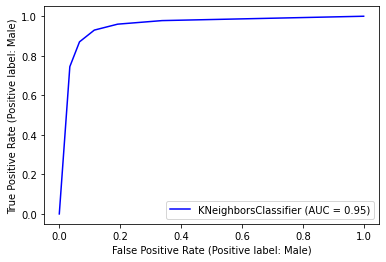

In [42]:
plot_roc_curve(kn_clf, xtest_dt, ytest_dt, color='Blue')